In [1]:
import wikipedia
import spacy

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [2]:
nlp=spacy.load("en_core_web_sm")

In [3]:
def pages_to_sentences(*pages):
    sentences=[]
    
    for page in pages:
        p=wikipedia.page(page)
        doc=nlp(p.content)
        sentences+= [sent .text for sent in doc.sents]
    
    return sentences

In [48]:
def get_corpus(words):
    corpus=[]
    labels=[]
    
    for k,v in words.items():
        docs=pages_to_sentences(*v)
        corpus+=docs
        labels+= [k]*len(docs)
        
    return corpus,labels


words={"animal":["Reticulated python","Ball python"],
       "language":["Python(programming language)"]}



In [49]:
corpus,labels = get_corpus(words)

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(corpus,labels,test_size=0.2,random_state=0)

In [51]:
model=Pipeline([("tfidf",TfidfVectorizer()),("models",MultinomialNB())])
model.fit(X_train,y_train)
print("Test Score {}".format(model.score(X_test,y_test)))
print("Train Score {}".format(model.score(X_train,y_train)))

Test Score 0.8588235294117647
Train Score 0.9113737075332349


# we will try to improve its accuray

In [52]:
def lemmatizer(text):
    return [word.lemma_ for word in nlp(text)]

In [53]:
param_grid={"tfidf__ngram_range":[(1,1),(1,2)],
            "tfidf__tokenizer":[None,lemmatizer]}


grid_search=GridSearchCV(model,param_grid,cv=5,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [54]:
results=grid_search.cv_results_

In [57]:
results

{'mean_fit_time': array([0.02561412, 5.61152096, 0.03188124, 6.22846379]),
 'std_fit_time': array([0.01345282, 0.13174402, 0.00289801, 0.14376555]),
 'mean_score_time': array([0.00449085, 1.38559422, 0.00484543, 1.56853156]),
 'std_score_time': array([0.00241236, 0.05471752, 0.000391  , 0.08600233]),
 'param_tfidf__ngram_range': masked_array(data=[(1, 1), (1, 1), (1, 2), (1, 2)],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_tfidf__tokenizer': masked_array(data=[None, <function lemmatizer at 0x7ff5b895d2f0>, None,
                    <function lemmatizer at 0x7ff5b895d2f0>],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'tfidf__ngram_range': (1, 1), 'tfidf__tokenizer': None},
  {'tfidf__ngram_range': (1, 1),
   'tfidf__tokenizer': <function __main__.lemmatizer(text)>},
  {'tfidf__ngram_range': (1, 2), 'tfidf__tokenizer': None},
  {'tfidf__ngram_range': (1, 

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

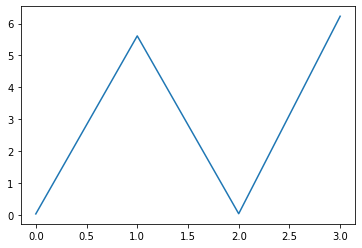

In [62]:
plt.plot(results["mean_fit_time"])

In [56]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'tfidf__ngram_range': (1, 1), 'tfidf__tokenizer': None}
0.8168736383442265
